In [3]:
import pandas as pd
from pandas.api.types import is_string_dtype, is_numeric_dtype
from ydata_profiling import ProfileReport
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
import types
import re
import requests
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from matplotlib import style
%matplotlib inline     
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
import plotly
import plotly.express as px


import catboost
import time

from catboost import Pool, sum_models
from sklearn.metrics import balanced_accuracy_score
from catboost import CatBoostClassifier
from sklearn.model_selection import StratifiedKFold

# Data Cleaning

In [253]:
#Cleaning Datasets Coded By Himanshu Shekhar: Start

#Cleaning DataSets


# Import the training and test data and parsing the date column.
trainDF = pd.read_csv('TrainingSetValues.csv', low_memory=False, parse_dates=['date_recorded'])
testDF = pd.read_csv('TestSetValues.csv', low_memory=False, parse_dates=['date_recorded'])

In [254]:
trainDF.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [255]:
testDF.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [256]:
labelDF = pd.read_csv('TrainingSetLabel.csv')
labelDF.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [257]:
# Merge training dataset and label dataset tables so that independant variable is in the training dataset. 
trainDF_merge = pd.merge(trainDF, labelDF)

In [258]:
trainDF_merge.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [259]:
#Summarizing the dataset as a report on Train and Test datasets.

trainDF_mergeProfile = ProfileReport(trainDF_merge, title="Profiling Report")
testDF_Profile = ProfileReport(testDF, title="Profiling Report")

In [9]:
trainDF_mergeProfile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [10]:
testDF_Profile.to_widgets()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [260]:
#dropping column which have huge number of missing data.
trainDF_merge.drop(['installer', 'public_meeting', 'scheme_management','scheme_name', 'permit','subvillage'],axis=1, inplace=True)
testDF.drop(['installer', 'public_meeting', 'scheme_management','scheme_name', 'permit','subvillage'],axis=1, inplace=True)

In [261]:
trainDF_merge.shape

(59400, 35)

In [262]:
trainDF_merge.isna().sum()

id                          0
amount_tsh                  0
date_recorded               0
funder                   3635
gps_height                  0
longitude                   0
latitude                    0
wpt_name                    0
num_private                 0
basin                       0
region                      0
region_code                 0
district_code               0
lga                         0
ward                        0
population                  0
recorded_by                 0
construction_year           0
extraction_type             0
extraction_type_group       0
extraction_type_class       0
management                  0
management_group            0
payment                     0
payment_type                0
water_quality               0
quality_group               0
quantity                    0
quantity_group              0
source                      0
source_type                 0
source_class                0
waterpoint_type             0
waterpoint

In [263]:
testDF.shape

(14850, 34)

In [264]:
trainDF_merge.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [265]:
testDF.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

In [266]:
trainDF_merge['funder'].replace(np.NaN, 'Other')

0                  Roman
1                Grumeti
2           Lottery Club
3                 Unicef
4            Action In A
              ...       
59395    Germany Republi
59396        Cefa-njombe
59397              Other
59398              Malec
59399         World Bank
Name: funder, Length: 59400, dtype: object

In [267]:
testDF['funder'].replace(np.NaN, 'Other')

0                          Dmdd
1        Government Of Tanzania
2                         Other
3                    Finn Water
4                        Bruder
                  ...          
14845                    Danida
14846                      Hiap
14847                     Other
14848                   Germany
14849    Government Of Tanzania
Name: funder, Length: 14850, dtype: object

In [403]:
trainDF_merge['funder'].isna().sum()

3635

In [268]:
#Checking on similar columns in both training and test datasets and dropping one of them if two columns have very similar data.

trainDF_merge['quantity'].value_counts()


enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64

In [269]:
trainDF_merge['quantity_group'].value_counts()

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64

In [270]:
testDF['quantity'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity, dtype: int64

In [271]:
testDF['quantity_group'].value_counts()

enough          8336
insufficient    3767
dry             1536
seasonal        1025
unknown          186
Name: quantity_group, dtype: int64

In [272]:
#Droping column quantity_group as it has same data as column "quantity"
trainDF_merge.drop(['quantity_group'], axis = 1, inplace=True)
testDF.drop(['quantity_group'], axis = 1, inplace=True)

In [273]:
trainDF_merge.shape

(59400, 34)

In [274]:
testDF.shape

(14850, 33)

In [275]:
trainDF_merge['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [276]:
trainDF_merge['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [277]:
trainDF_merge['waterpoint_type'].value_counts()

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64

In [278]:
trainDF_merge['waterpoint_type_group'].value_counts()

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64

In [279]:
testDF['waterpoint_type'].value_counts()

communal standpipe             7106
hand pump                      4396
other                          1630
communal standpipe multiple    1508
improved spring                 175
cattle trough                    34
dam                               1
Name: waterpoint_type, dtype: int64

In [280]:
testDF['waterpoint_type_group'].value_counts()

communal standpipe    8614
hand pump             4396
other                 1630
improved spring        175
cattle trough           34
dam                      1
Name: waterpoint_type_group, dtype: int64

In [281]:
#dropping 'waterpoint_type' as 'waterpoint_type_group' has similar data and adds up to the exact numbers as group.

trainDF_merge.drop(['waterpoint_type'], axis = 1, inplace=True)
testDF.drop(['waterpoint_type'], axis = 1, inplace=True)

In [282]:
trainDF_merge['water_quality'].value_counts()

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64

In [283]:
trainDF_merge['quality_group'].value_counts()

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64

In [284]:
testDF['water_quality'].value_counts()

soft                  12687
salty                  1226
unknown                 469
milky                   201
coloured                133
salty abandoned          84
fluoride                 44
fluoride abandoned        6
Name: water_quality, dtype: int64

In [285]:
testDF['quality_group'].value_counts()

good        12687
salty        1310
unknown       469
milky         201
colored       133
fluoride       50
Name: quality_group, dtype: int64

In [286]:
##dropping 'water_quality' as 'quality_group' has similar data and adds up to the exact numbers as group. Also renaming the column for proper label.

trainDF_merge.drop(['water_quality'], axis = 1, inplace=True)
testDF.drop(['water_quality'], axis = 1, inplace=True)
trainDF_merge.rename(columns = {'quality_group':'water_quality_group'}, inplace = True)
testDF.rename(columns = {'quality_group':'water_quality_group'}, inplace = True)

In [287]:
trainDF_merge['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [288]:
trainDF_merge['payment'].value_counts()

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64

In [289]:
testDF['payment_type'].value_counts()

never pay     6364
per bucket    2281
monthly       2097
unknown       1992
annually       928
on failure     928
other          260
Name: payment_type, dtype: int64

In [290]:
testDF['payment'].value_counts()

never pay                6364
pay per bucket           2281
pay monthly              2097
unknown                  1992
pay annually              928
pay when scheme fails     928
other                     260
Name: payment, dtype: int64

In [291]:
##dropping 'payment' as 'payment_type' has similar data.
trainDF_merge.drop(['payment'], axis = 1, inplace=True)
testDF.drop(['payment'], axis = 1, inplace=True)

In [292]:
trainDF_merge.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality_group', 'quantity',
       'source', 'source_type', 'source_class', 'waterpoint_type_group',
       'status_group'],
      dtype='object')

In [293]:
testDF.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'longitude', 'latitude', 'wpt_name', 'num_private', 'basin', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'recorded_by', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality_group', 'quantity',
       'source', 'source_type', 'source_class', 'waterpoint_type_group'],
      dtype='object')

In [294]:
trainDF_merge['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [295]:
trainDF_merge['construction_year'] = trainDF_merge['construction_year']. replace(0,np. nan)

In [296]:
trainDF_merge['construction_year'].isna()

0        False
1        False
2        False
3        False
4         True
         ...  
59395    False
59396    False
59397     True
59398     True
59399    False
Name: construction_year, Length: 59400, dtype: bool

In [297]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

column_for_imputation = ['construction_year']
iterImputer = IterativeImputer(estimator= BayesianRidge(), min_value= 1960, max_value=2013)
construction_year_imp = np.round(iterImputer.fit_transform(trainDF_merge[column_for_imputation])[:,-1], 0)

df_iter_imputed = pd.DataFrame(construction_year_imp, columns=['construction_year'])

In [298]:
df_iter_imputed.head()

,construction_year
0,1999.0
1,2010.0
2,2009.0
3,1986.0
4,1997.0


In [299]:
trainDF_merge['construction_year'] = df_iter_imputed['construction_year']

In [300]:
trainDF_merge['construction_year'].value_counts()

1997.0    21353
2010.0     2645
2008.0     2613
2009.0     2533
2000.0     2091
2007.0     1587
2006.0     1471
2003.0     1286
2011.0     1256
2004.0     1123
2012.0     1084
2002.0     1075
1978.0     1037
1995.0     1014
2005.0     1011
1999.0      979
1998.0      966
1990.0      954
1985.0      945
1996.0      811
1980.0      811
1984.0      779
1982.0      744
1994.0      738
1972.0      708
1974.0      676
1992.0      640
1993.0      608
2001.0      540
1988.0      521
1983.0      488
1975.0      437
1986.0      434
1976.0      414
1970.0      411
1991.0      324
1989.0      316
1987.0      302
1981.0      238
1977.0      202
1979.0      192
1973.0      184
2013.0      176
1971.0      145
1960.0      102
1967.0       88
1963.0       85
1968.0       77
1969.0       59
1964.0       40
1962.0       30
1961.0       21
1965.0       19
1966.0       17
Name: construction_year, dtype: int64

In [301]:
#The Construction year is widely distributed, it would be easier to read and understand data if construction year was grouped as decades.
#Creating a function to take construction year as an input and accordingly return the decade it belongs to.

def construction_year_in_decade(row):
    if row['construction_year'] >= 1960 and row['construction_year'] < 1970:
        return '1960s'
    elif row['construction_year'] >= 1970 and row['construction_year'] < 1980:
        return '1970s'
    elif row['construction_year'] >= 1980 and row['construction_year'] < 1990:
        return '1980s'
    elif row['construction_year'] >= 1990 and row['construction_year'] < 2000:
        return '1990s'
    elif row['construction_year'] >= 2000 and row['construction_year'] < 2010:
        return '2000s'
    elif row['construction_year'] >= 2010:
        return '2010s'
    else:
        return 'unknown'

In [302]:
trainDF_merge['construction_year'] = trainDF_merge.apply(lambda row: construction_year_in_decade(row), axis=1)
testDF['construction_year'] = testDF.apply(lambda row: construction_year_in_decade(row), axis=1)

In [303]:
trainDF_merge['construction_year'].value_counts()

1990s    28387
2000s    15330
1980s     5578
2010s     5161
1970s     4406
1960s      538
Name: construction_year, dtype: int64

In [304]:
testDF['construction_year'].value_counts()


unknown    5260
2000s      3833
1990s      1933
1980s      1361
2010s      1300
1970s      1042
1960s       121
Name: construction_year, dtype: int64

In [305]:
trainDF_merge['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

In [306]:
trainDF_merge['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [307]:
trainDF_merge.head()

,id,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,num_private,basin,...,management,management_group,payment_type,water_quality_group,quantity,source,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,none,0,Lake Nyasa,...,vwc,user-group,annually,good,enough,spring,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,wug,user-group,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,vwc,user-group,per bucket,good,enough,dam,dam,surface,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,vwc,user-group,never pay,good,dry,machine dbh,borehole,groundwater,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,other,other,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional


In [308]:
trainDF_merge.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
recorded_by                      object
construction_year                object
extraction_type                  object
extraction_type_group            object
extraction_type_class            object
management                       object
management_group                 object
payment_type                     object
water_quality_group              object


In [309]:
testDF.head()

,id,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_class,management,management_group,payment_type,water_quality_group,quantity,source,source_type,source_class,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,other,parastatal,parastatal,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,36.656709,-3.309214,Kimnyak,0,Pangani,...,gravity,vwc,user-group,never pay,good,insufficient,spring,spring,groundwater,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,34.767863,-5.004344,Puma Secondary,0,Internal,...,other,vwc,user-group,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other
3,45559,0.0,2013-01-22,Finn Water,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,other,vwc,user-group,unknown,good,dry,shallow well,shallow well,groundwater,other
4,49871,500.0,2013-03-27,Bruder,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,gravity,water board,user-group,monthly,good,enough,spring,spring,groundwater,communal standpipe


In [310]:
testDF.dtypes

id                                int64
amount_tsh                      float64
date_recorded            datetime64[ns]
funder                           object
gps_height                        int64
longitude                       float64
latitude                        float64
wpt_name                         object
num_private                       int64
basin                            object
region                           object
region_code                       int64
district_code                     int64
lga                              object
ward                             object
population                        int64
recorded_by                      object
construction_year                object
extraction_type                  object
extraction_type_group            object
extraction_type_class            object
management                       object
management_group                 object
payment_type                     object
water_quality_group              object


In [311]:
trainDF_merge.to_csv('clean_train_dataset.csv', index=False)
testDF.to_csv('clean_test_dataset.csv', index=False)

In [312]:
#Cleaning Datasets Coded By Himanshu Shekhar: End

# Exploratory Data Analysis

In [313]:
#EDA Coded by Siddharth Sharma: Start

In [314]:
df_train = pd.read_csv('clean_train_dataset.csv', index_col='id')
df_test = pd.read_csv('clean_test_dataset.csv', index_col='id')

In [315]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   longitude              59400 non-null  float64
 5   latitude               59400 non-null  float64
 6   wpt_name               59400 non-null  object 
 7   num_private            59400 non-null  int64  
 8   basin                  59400 non-null  object 
 9   region                 59400 non-null  object 
 10  region_code            59400 non-null  int64  
 11  district_code          59400 non-null  int64  
 12  lga                    59400 non-null  object 
 13  ward                   59400 non-null  object 
 14  population             59400 non-null  int64  
 15

In [316]:
label_count=df_train.groupby(["status_group"])["status_group"].count()

c:\Users\hshek\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



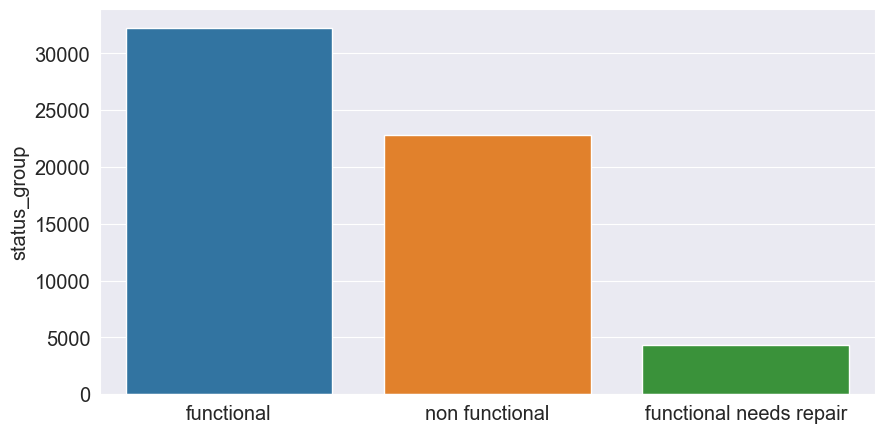

In [317]:
sns.set_style('darkgrid')
sns.barplot(df_train['status_group'].unique(),df_train['status_group'].value_counts())
plt.show()

In [318]:
df_quantity = df_train[['quantity']].join(pd.get_dummies(df_train['status_group'])).groupby(
    'quantity')[df_train['status_group'].unique()].apply(sum)

In [319]:
df_quantity

,functional,non functional,functional needs repair
quantity,,,
dry,157,6052,37
enough,21648,9138,2400
insufficient,7916,5763,1450
seasonal,2325,1309,416
unknown,213,562,14


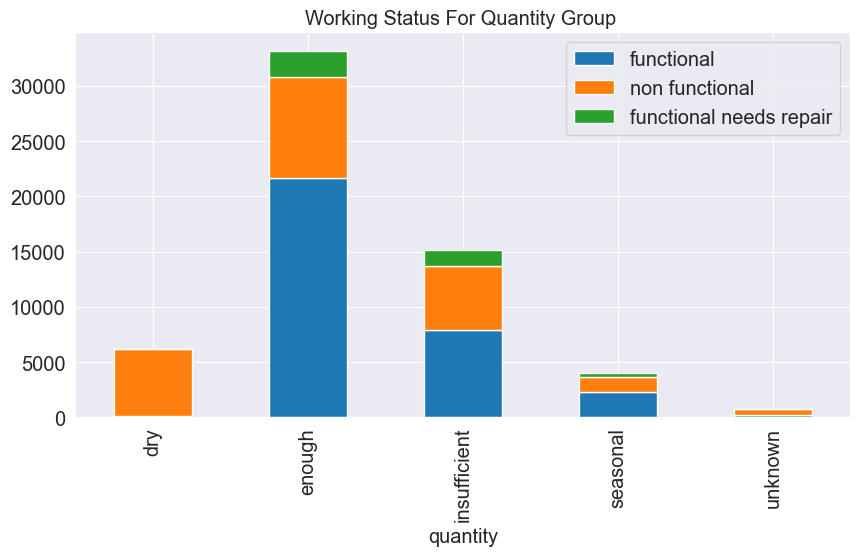

In [320]:
df_quantity.plot(kind="bar", stacked=True)
plt.title("Working Status For Quantity Group ")
plt.show()

In [321]:
water_quality_group = df_train[['water_quality_group']].join(pd.get_dummies(df_train['status_group'])).groupby(
    'water_quality_group')[df_train['status_group'].unique()].apply(sum)

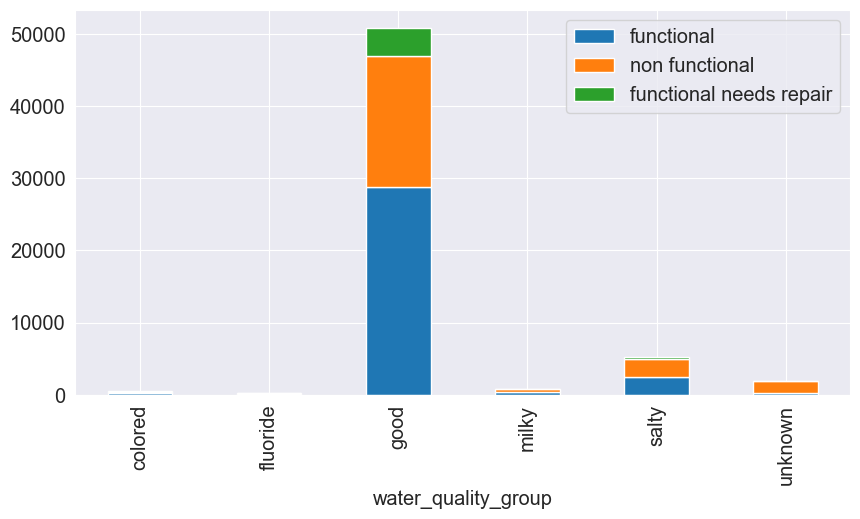

In [322]:
water_quality_group.plot(kind="bar", stacked=True)
plt.show()

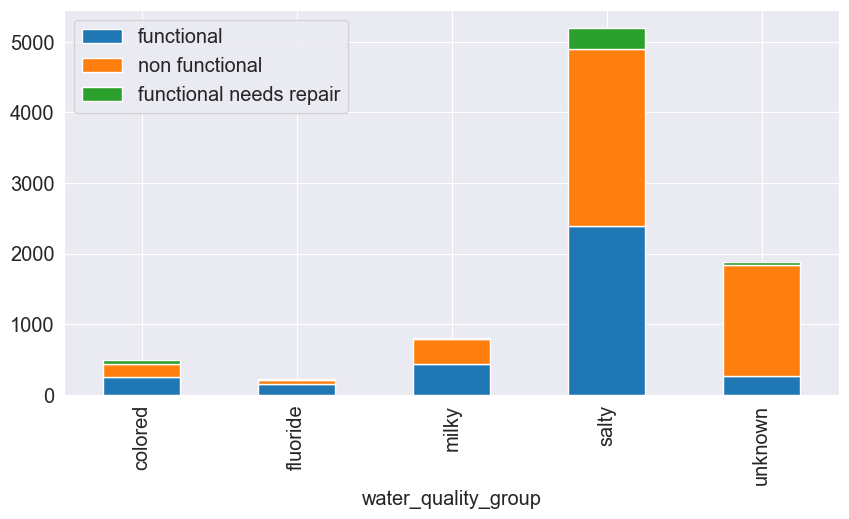

In [323]:
water_quality_group.loc[['colored','fluoride','milky','salty','unknown']].plot(kind="bar", stacked=True)
plt.show()

In [324]:
df_train['construction_year'] = df_train['construction_year'].astype(str)
df_year = df_train[['construction_year']].join(pd.get_dummies(df_train['status_group'])).groupby(
    'construction_year')[df_train['status_group'].unique()].apply(sum)

In [325]:
df_year

,functional,non functional,functional needs repair
construction_year,,,
1960s,156,340,42
1970s,1406,2652,348
1980s,2220,2935,423
1990s,14694,11386,2307
2000s,9989,4364,977
2010s,3794,1147,220


In [328]:
fig=px.bar(df_year,orientation='h',color_discrete_sequence=plotly.colors.qualitative.Prism,)
fig.update_layout(title = "Frequency chart for Decades",
     xaxis_title = 'Counts', yaxis_title = 'Decades')
fig.show()

In [329]:
df_basin = df_train[['basin']].join(pd.get_dummies(df_train['status_group'])).groupby(
     'basin')[df_train['status_group'].unique()].apply(sum)

colors = plotly.colors.qualitative.Prism
fig=px.bar(df_basin,orientation='h',color_discrete_sequence=colors,)
fig.update_layout(title = "Frequency chart for basin",
     xaxis_title = 'Counts', yaxis_title = 'Basin')
fig.show()

In [330]:
df_pay = df_train[['payment_type']].join(pd.get_dummies(df_train['status_group'])).groupby(['payment_type'])[df_train['status_group'].unique()].apply(sum)

In [331]:
fig=px.bar(df_pay,orientation='h',color_discrete_sequence=colors,)
fig.update_layout(title = "Frequency chart for Payment Type",
     xaxis_title = 'Counts', yaxis_title = 'Payment')
fig.show()


In [332]:
df_train.where(df_train.population==0).dropna().head()

,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,num_private,basin,region,...,management,management_group,payment_type,water_quality_group,quantity,source,source_type,source_class,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
19728,0.0,2011-07-13,Action In A,0.0,31.130847,-1.825359,Shuleni,0.0,Lake Victoria,Kagera,...,other,other,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
19816,0.0,2012-10-01,Dwsp,0.0,33.362410,-3.766365,Kwa Ngomho,0.0,Internal,Shinyanga,...,vwc,user-group,never pay,good,enough,machine dbh,borehole,groundwater,hand pump,non functional
54551,0.0,2012-10-09,Rwssp,0.0,32.620617,-4.226198,Tushirikiane,0.0,Lake Tanganyika,Shinyanga,...,wug,user-group,unknown,milky,enough,shallow well,shallow well,groundwater,hand pump,non functional
53934,0.0,2012-11-03,Wateraid,0.0,32.711100,-5.146712,Kwa Ramadhan Musa,0.0,Lake Tanganyika,Tabora,...,vwc,user-group,never pay,salty,seasonal,machine dbh,borehole,groundwater,hand pump,non functional
46144,0.0,2011-08-03,Isingiro Ho,0.0,30.626991,-1.257051,Kwapeto,0.0,Lake Victoria,Kagera,...,vwc,user-group,never pay,good,enough,shallow well,shallow well,groundwater,hand pump,functional


In [333]:
df_train['amount_tsh_percapita'] = list(map(lambda x,y: x/(y+1), df_train['amount_tsh'], df_train['population']))

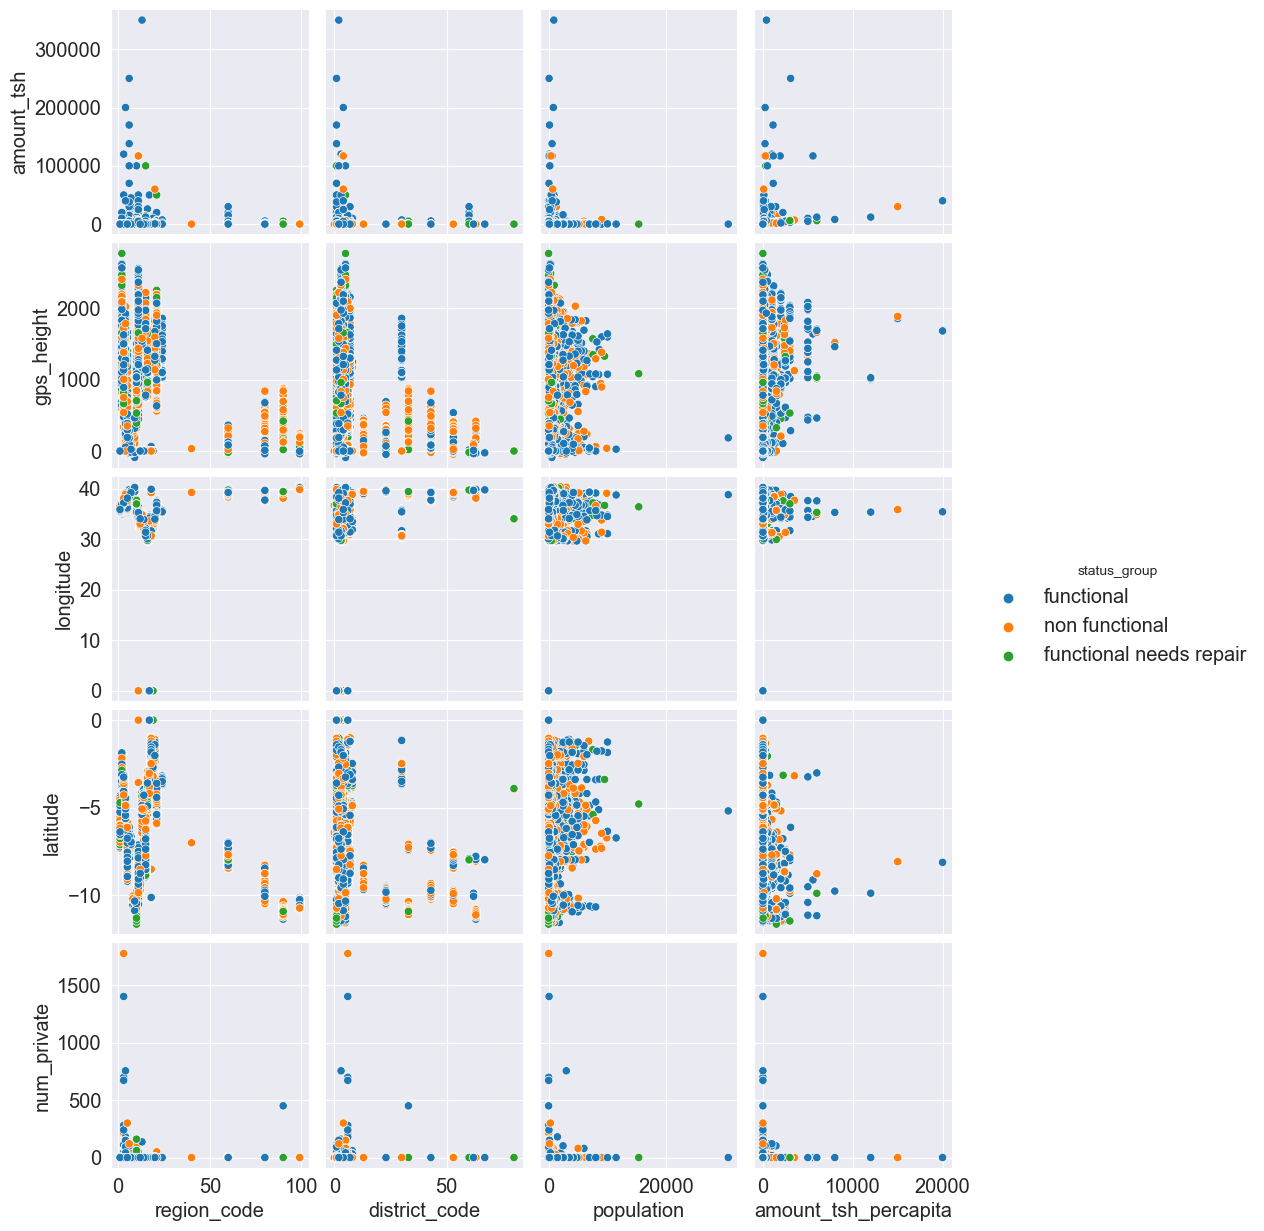

In [334]:
df_train=df_train.reset_index()
sns.pairplot(data=df_train.drop(labels=['id'], axis=1), hue='status_group', 
             x_vars=df_train.select_dtypes(exclude=object).columns[6:12], 
             y_vars=df_train.select_dtypes(exclude=object).columns[1:6])

(0.0, 40.0)

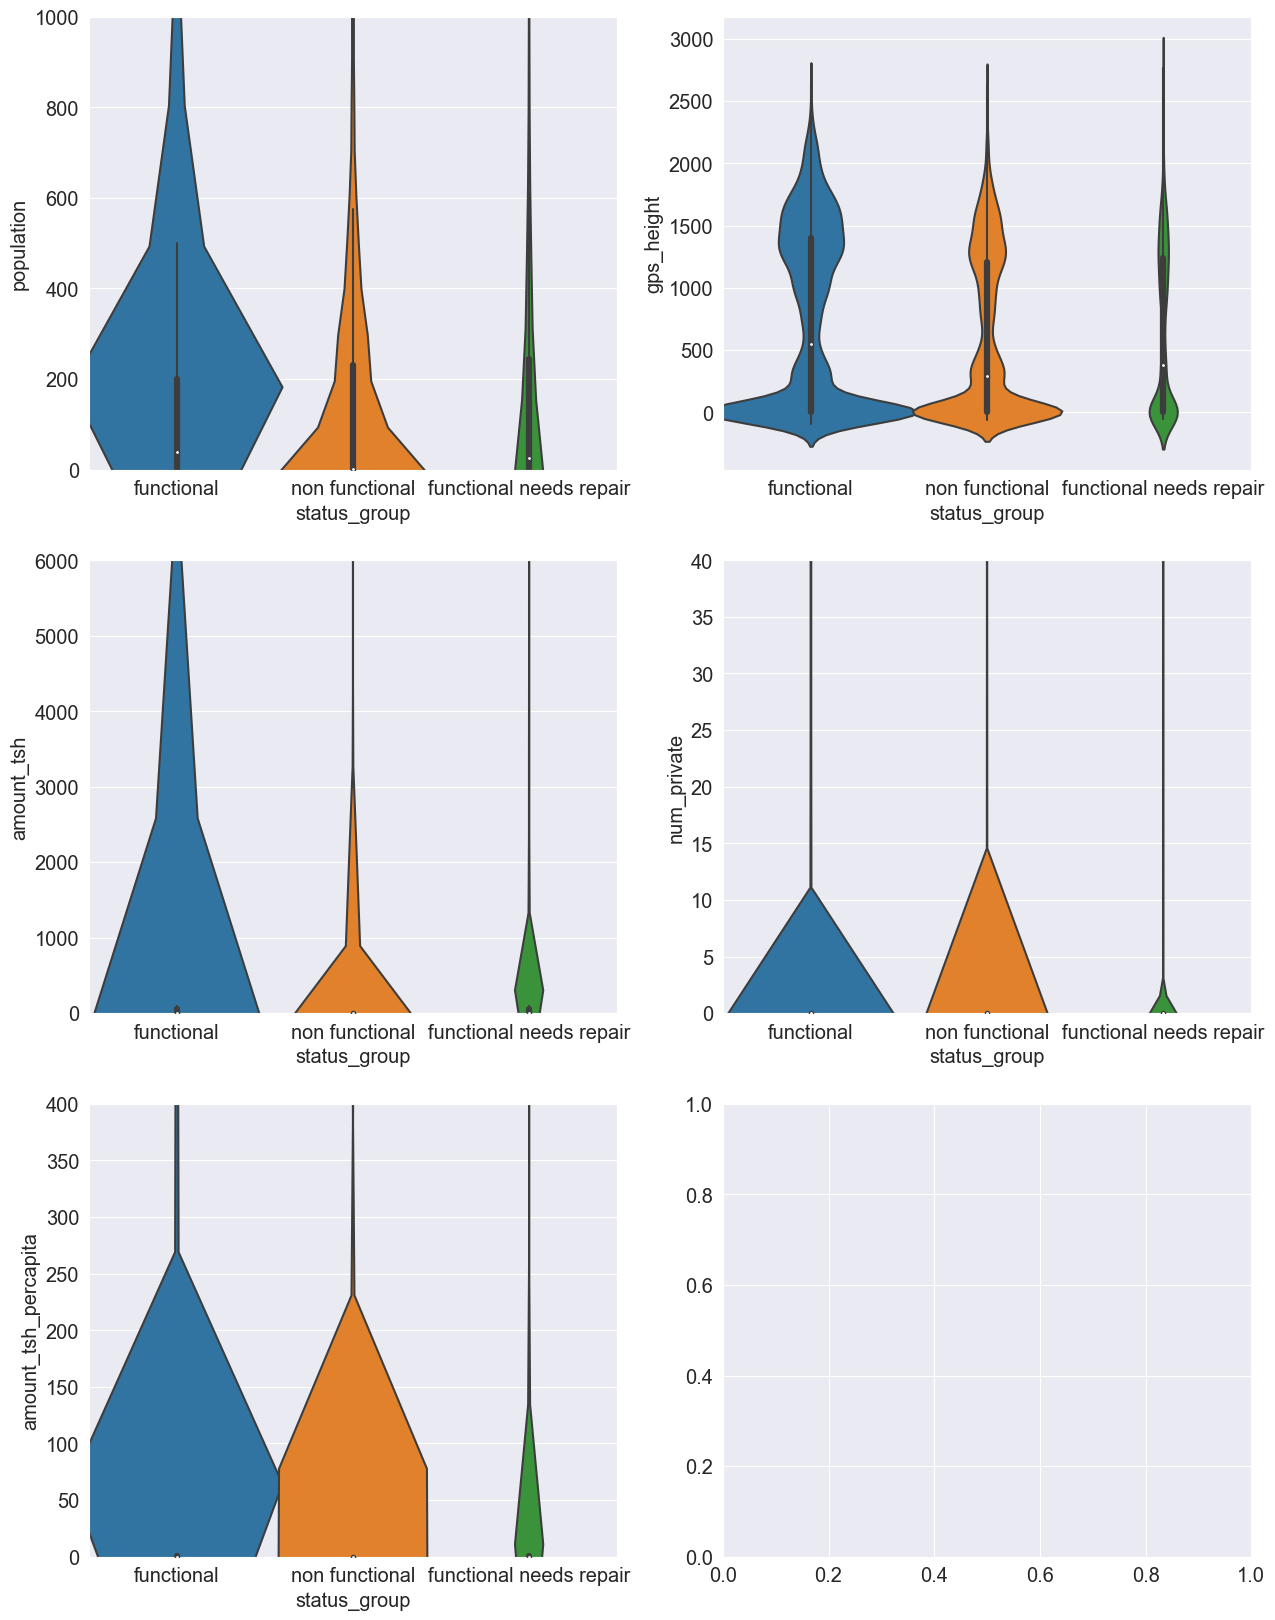

In [335]:
fig, ax = plt.subplots(nrows=3, ncols=2)
fig.set_figwidth(15)
fig.set_figheight(20)
sns.violinplot(x = 'status_group', y='population', data=df_train, ax=ax[0,0], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='amount_tsh', data=df_train,  ax=ax[1,0], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='amount_tsh_percapita', data=df_train, ax=ax[2,0], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='gps_height', data=df_train, ax=ax[0,1], scale='count', width=1.2)
sns.violinplot(x = 'status_group', y='num_private', data=df_train, ax=ax[1,1], scale='count', width=1.2)
ax[0,0].set_ylim(0, 1000)
ax[1,0].set_ylim(0, 6000)
ax[2,0].set_ylim(0, 400)
ax[1,1].set_ylim(0, 40)

In [336]:
#EDA Coded by Siddharth Sharma: End

# ML Models (Logistic Regression and Random Forest Classifier) - Himanshu Shekhar

In [337]:
#ML Model Coded By Himanshu Shekhar: Start

In [338]:
#Reading Cleaning Train dataset.
df_train = pd.read_csv('clean_train_dataset.csv')
df_train.head()

,id,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,num_private,basin,...,management,management_group,payment_type,water_quality_group,quantity,source,source_type,source_class,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,34.938093,-9.856322,none,0,Lake Nyasa,...,vwc,user-group,annually,good,enough,spring,spring,groundwater,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,wug,user-group,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,vwc,user-group,per bucket,good,enough,dam,dam,surface,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,vwc,user-group,never pay,good,dry,machine dbh,borehole,groundwater,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,other,other,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional


In [339]:
#Reading Cleaning Test dataset.
df_test = pd.read_csv('clean_test_dataset.csv')
df_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,longitude,latitude,wpt_name,num_private,basin,...,extraction_type_class,management,management_group,payment_type,water_quality_group,quantity,source,source_type,source_class,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,35.290799,-4.059696,Dinamu Secondary School,0,Internal,...,other,parastatal,parastatal,never pay,good,seasonal,rainwater harvesting,rainwater harvesting,surface,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,36.656709,-3.309214,Kimnyak,0,Pangani,...,gravity,vwc,user-group,never pay,good,insufficient,spring,spring,groundwater,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,34.767863,-5.004344,Puma Secondary,0,Internal,...,other,vwc,user-group,never pay,good,insufficient,rainwater harvesting,rainwater harvesting,surface,other
3,45559,0.0,2013-01-22,Finn Water,267,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,...,other,vwc,user-group,unknown,good,dry,shallow well,shallow well,groundwater,other
4,49871,500.0,2013-03-27,Bruder,1260,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,...,gravity,water board,user-group,monthly,good,enough,spring,spring,groundwater,communal standpipe


In [340]:
df_train.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
recorded_by               object
construction_year         object
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality_group       object
quantity                  object
source                    object
source_type               object
source_class              object
waterpoint_type_group     object
status_gro

In [341]:
df_train['construction_year'].value_counts()

1990s    28387
2000s    15330
1980s     5578
2010s     5161
1970s     4406
1960s      538
Name: construction_year, dtype: int64

In [342]:
df_test.dtypes

id                         int64
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
recorded_by               object
construction_year         object
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management_group          object
payment_type              object
water_quality_group       object
quantity                  object
source                    object
source_type               object
source_class              object
waterpoint_type_group     object
dtype: obj

In [343]:
# Find all columns that are objects.
cols = df_train.select_dtypes(exclude=[np.number])
list(cols)

['date_recorded',
 'funder',
 'wpt_name',
 'basin',
 'region',
 'lga',
 'ward',
 'recorded_by',
 'construction_year',
 'extraction_type',
 'extraction_type_group',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type',
 'water_quality_group',
 'quantity',
 'source',
 'source_type',
 'source_class',
 'waterpoint_type_group',
 'status_group']

In [344]:
# Create dataframe of 'best parameters' to be converted into dummy variables. 
cols2 = df_train[['waterpoint_type_group', 'construction_year', 'extraction_type_class','management',
                'management_group', 'payment_type', 'water_quality_group', 'quantity', 'basin',
                'region', 'source', 'source_class']]
list(cols2)

['waterpoint_type_group',
 'construction_year',
 'extraction_type_class',
 'management',
 'management_group',
 'payment_type',
 'water_quality_group',
 'quantity',
 'basin',
 'region',
 'source',
 'source_class']

In [345]:
# create dummy variables for columns in cols2
dummy_columns = pd.get_dummies(cols2)
dummy_columns.head()

,waterpoint_type_group_cattle trough,waterpoint_type_group_communal standpipe,waterpoint_type_group_dam,waterpoint_type_group_hand pump,waterpoint_type_group_improved spring,waterpoint_type_group_other,construction_year_1960s,construction_year_1970s,construction_year_1980s,construction_year_1990s,...,source_machine dbh,source_other,source_rainwater harvesting,source_river,source_shallow well,source_spring,source_unknown,source_class_groundwater,source_class_surface,source_class_unknown
0,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [346]:
#checking and reassuring labels of status_group
df_train['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair'],
      dtype=object)

In [347]:
y = df_train['status_group'].values
X = dummy_columns

In [348]:
#Splitting Train and Test Data into 80-20 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [349]:
#Scaling input columns
from sklearn.discriminant_analysis import StandardScaler


ss = StandardScaler()
scaled_X = ss.fit_transform(X)

# Logistic Regression

In [350]:
#k-fold cross-validation logistic regression.

k_fold = KFold(n_splits=5, random_state=0, shuffle=True)
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X_train, y_train)
results = cross_val_score(lr_model, X, y, cv=k_fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 73.108% (0.600%)


In [351]:
lr_model.score(X_test, y_test)

0.734006734006734

In [352]:
#Interpretation of Model Output

y_preds_lr = lr_model.predict(X_test)
print(classification_report(y_test, y_preds_lr))
pd.DataFrame(confusion_matrix(y_test, y_preds_lr), 
             columns=['Pred +', 'Pred Fix', 'Pred -'], 
             index=['Act +', 'Act Fix', 'Act -'])

                         precision    recall  f1-score   support

             functional       0.71      0.90      0.79      6416
functional needs repair       0.36      0.02      0.05       832
         non functional       0.80      0.63      0.70      4632

               accuracy                           0.73     11880
              macro avg       0.62      0.52      0.51     11880
           weighted avg       0.72      0.73      0.71     11880



,Pred +,Pred Fix,Pred -
Act +,5778,16,622
Act Fix,689,20,123
Act -,1690,20,2922


In [353]:
#Predicting on Test Dataset
preds_lr = pd.DataFrame(y_preds_lr)
n_test = pd.read_csv('clean_test_dataset.csv')
predict_lr = pd.concat((n_test['id'], preds_lr), axis=1)
predict_lr.columns=['id', 'status_group']
predict_lr.head()

,id,status_group
0,50785,non functional
1,51630,non functional
2,17168,non functional
3,45559,functional
4,49871,functional


# Random Forest Classifier

In [354]:
rfc = RandomForestClassifier(random_state=42)

param_grid =  {
    'n_estimators': [200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None,32],
    'min_samples_split': [4, 7],
}

rfc_grid_search = GridSearchCV(rfc, param_grid,scoring='accuracy', cv=3, n_jobs=1)
rfc_grid_search.fit(X_train, y_train)

y_test_pred_rfc = rfc_grid_search.predict(X_test)
y_train_pred_rfc = rfc_grid_search.predict(X_train)

print('*********************************************************************')
print(confusion_matrix(y_test, y_test_pred_rfc))

print('*********************************************************************')
print(classification_report(y_test, y_test_pred_rfc))

*********************************************************************
[[5655  111  650]
 [ 551  149  132]
 [1162   48 3422]]
*********************************************************************
                         precision    recall  f1-score   support

             functional       0.77      0.88      0.82      6416
functional needs repair       0.48      0.18      0.26       832
         non functional       0.81      0.74      0.77      4632

               accuracy                           0.78     11880
              macro avg       0.69      0.60      0.62     11880
           weighted avg       0.77      0.78      0.76     11880



In [355]:
rfc_grid_search.score(X_test,y_test)

0.7765993265993266

In [356]:
n_test = pd.read_csv('TestSetValues.csv')
n_test.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [357]:
#Predicting on test set
predict_rfc = pd.concat((n_test['id'], y_test_pred_rfc), axis=1)
predict_rfc.columns=['id', 'status_group']
predict_rfc['status_group'].unique()

array(['functional', 'non functional', 'functional needs repair', nan],
      dtype=object)

In [358]:
predict_rfc.head()

,id,status_group
0,50785,functional
1,51630,non functional
2,17168,non functional
3,45559,functional
4,49871,functional


In [359]:
#ML Model Coded By Himanshu Shekhar: End

# ML Model - Siddharth Sharma

In [4]:
FOLDS = 10
SEEDS = [42]
VERSION = round(time.time())

df_train_cb = pd.read_csv('clean_train_dataset.csv', index_col='id')
df_test_cb = pd.read_csv('clean_test_dataset.csv', index_col='id')

In [5]:
df_train_cb['funder'].isna().sum()

3635

In [6]:
df_train = df_train_cb.replace(np.nan, 'Other')
df_test = df_test_cb.replace(np.nan, 'Other')

In [7]:
df_train.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality_group      0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

In [418]:
df_test.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality_group      0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type_group    0
dtype: int64

In [8]:
def fit_model(train_pool, test_pool, **kwargs):
    model = CatBoostClassifier(
        max_ctr_complexity=5,
        iterations=100,
        eval_metric='AUC',
        od_type='Iter',
        od_wait=500,
        **kwargs
    )

    return model.fit(
        train_pool,
        eval_set=test_pool,
        verbose=1000,
        plot=True,
        use_best_model=True)

In [9]:
num_cols = [
    'amount_tsh', 'gps_height', 'longitude', 'latitude', 'num_private',
    'district_code', 'population'
]
cat_features = [x for x in df_train.columns if x not in num_cols and x != 'status_group']
df_train[cat_features] = df_train[cat_features].astype('category')
df_test[cat_features] = df_test[cat_features].astype('category')

In [10]:
def classification_rate(y, y_pred):
    return np.sum(y == y_pred) / len(y)

In [11]:
def get_oof(n_folds, x_train, y, x_test, cat_features, seeds):
    ntrain = x_train.shape[0]
    ntest = x_test.shape[0]

    oof_train = np.zeros((len(seeds), ntrain, 3))
    oof_test = np.zeros((ntest, 3))
    oof_test_skf = np.empty((len(seeds), n_folds, ntest, 3))

    test_pool = Pool(data=x_test, cat_features=cat_features)
    models = {}

    for iseed, seed in enumerate(seeds):
        kf = StratifiedKFold(
            n_splits=n_folds,
            shuffle=True,
            random_state=seed)
        for i, (train_index, test_index) in enumerate(kf.split(x_train, y)):
            print(f'\nSeed {seed}, Fold {i}')
            x_tr = x_train.iloc[train_index, :]
            y_tr = y[train_index]
            x_te = x_train.iloc[test_index, :]
            y_te = y[test_index]
            train_pool = Pool(data=x_tr, label=y_tr, cat_features=cat_features)
            valid_pool = Pool(data=x_te, label=y_te, cat_features=cat_features)

            model = fit_model(
                train_pool, valid_pool,
                loss_function='MultiClass',
                random_seed=seed
            )
            oof_train[iseed, test_index, :] = model.predict_proba(x_te)
            oof_test_skf[iseed, i, :, :] = model.predict_proba(x_test)
            models[(seed, i)] = model
            model.save_model(
                f"cb_{seed}_{i}_{VERSION}.cbm",
                format="cbm", export_parameters=None, pool=None)

    oof_test[:, :] = oof_test_skf.mean(axis=1).mean(axis=0)
    oof_train = oof_train.mean(axis=0)
    return oof_train, oof_test, models

In [12]:
y_train, X_train = df_train['status_group'], df_train.drop(['status_group'], axis=1)

In [13]:
df_train.isna().sum()

amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
recorded_by              0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment_type             0
water_quality_group      0
quantity                 0
source                   0
source_type              0
source_class             0
waterpoint_type_group    0
status_group             0
dtype: int64

In [14]:
oof_train, oof_test, models = get_oof(
    n_folds=FOLDS,
    x_train=X_train,
    y=y_train.values,
    x_test=df_test,
    cat_features=cat_features,
    seeds=SEEDS)


Seed 42, Fold 0


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.8098299	best: 0.8098299 (0)	total: 504ms	remaining: 49.9s
99:	test: 0.9189307	best: 0.9189747 (98)	total: 28.6s	remaining: 0us

bestTest = 0.9189746734
bestIteration = 98

Shrink model to first 99 iterations.

Seed 42, Fold 1


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7708017	best: 0.7708017 (0)	total: 361ms	remaining: 35.7s
99:	test: 0.9093633	best: 0.9093748 (96)	total: 25.7s	remaining: 0us

bestTest = 0.909374823
bestIteration = 96

Shrink model to first 97 iterations.

Seed 42, Fold 2


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7835117	best: 0.7835117 (0)	total: 274ms	remaining: 27.2s
99:	test: 0.9109672	best: 0.9112392 (87)	total: 26.3s	remaining: 0us

bestTest = 0.9112391896
bestIteration = 87

Shrink model to first 88 iterations.

Seed 42, Fold 3


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7852114	best: 0.7852114 (0)	total: 291ms	remaining: 28.8s
99:	test: 0.9091316	best: 0.9091316 (99)	total: 26.2s	remaining: 0us

bestTest = 0.9091315525
bestIteration = 99


Seed 42, Fold 4


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7720416	best: 0.7720416 (0)	total: 249ms	remaining: 24.7s
99:	test: 0.9086882	best: 0.9086882 (99)	total: 26.1s	remaining: 0us

bestTest = 0.9086881815
bestIteration = 99


Seed 42, Fold 5


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7752642	best: 0.7752642 (0)	total: 278ms	remaining: 27.5s
99:	test: 0.9060642	best: 0.9061079 (97)	total: 29.9s	remaining: 0us

bestTest = 0.9061078887
bestIteration = 97

Shrink model to first 98 iterations.

Seed 42, Fold 6


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7673314	best: 0.7673314 (0)	total: 287ms	remaining: 28.4s
99:	test: 0.9017981	best: 0.9017981 (99)	total: 28.5s	remaining: 0us

bestTest = 0.9017981453
bestIteration = 99


Seed 42, Fold 7


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7738996	best: 0.7738996 (0)	total: 278ms	remaining: 27.5s
99:	test: 0.9119045	best: 0.9119045 (99)	total: 25.6s	remaining: 0us

bestTest = 0.9119044861
bestIteration = 99


Seed 42, Fold 8


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7813233	best: 0.7813233 (0)	total: 247ms	remaining: 24.4s
99:	test: 0.9036767	best: 0.9037138 (96)	total: 29s	remaining: 0us

bestTest = 0.9037137859
bestIteration = 96

Shrink model to first 97 iterations.

Seed 42, Fold 9


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.281766
0:	test: 0.7691141	best: 0.7691141 (0)	total: 340ms	remaining: 33.7s
99:	test: 0.9061397	best: 0.9061397 (99)	total: 27s	remaining: 0us

bestTest = 0.9061396549
bestIteration = 99



In [15]:
m = models[(SEEDS[0], 0)]
fea_imp = pd.DataFrame({'importance': m.feature_importances_,
                        'col': m.feature_names_})
fea_imp = fea_imp.sort_values(['importance', 'col'],
                              ascending=[True, False]).iloc[-40:]

y_pred_train = np.array([models[(SEEDS[0], 0)].classes_[x] for x in oof_train.argmax(axis=1)])
print(f"balanced accuracy: {balanced_accuracy_score(y_train, y_pred_train)}")
class_rate = classification_rate(y_train, y_pred_train)
print(f"classification rate: {class_rate}")

y_pred = np.array([models[(SEEDS[0], 0)].classes_[x] for x in oof_test.argmax(axis=1)])

balanced accuracy: 0.648875295882188
classification rate: 0.8031481481481482
